In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [2]:
import os
currdir = os.getcwd()

In [3]:
os.listdir(currdir)

['.ipynb_checkpoints',
 '740_1375_compressed_Chicago_Crimes_2001_to_2004.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2005_to_2007.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2008_to_2011.csv.zip',
 'aclImdb',
 'aclImdb.zip',
 'Avocado Price Prediction.ipynb',
 'avocado.csv',
 'CaliforniPricePrediction.ipynb',
 'Car Price Prediction.ipynb',
 'Car_Purchasing_Data.csv',
 'ChicagoCrimeRatePredictions.ipynb',
 'Chicago_Crimes_2001_to_2004.csv',
 'Chicago_Crimes_2005_to_2007.csv',
 'Chicago_Crimes_2008_to_2011.csv',
 'cifar-10-python.tar.gz',
 'CIFAR10.ipynb',
 'cifar10_model_1.h5',
 'Codalab',
 'datasets',
 'glove.6B.zip',
 'gloveDir',
 'Hackerearth',
 'jena_climate_2009_2016.csv',
 'jena_climate_2009_2016.csv.zip',
 'Kaggle',
 'MNIST Dataset classification.ipynb',
 'pre_trained_glove_model.h5',
 'TemperatureForecasting.ipynb',
 'Untitled.ipynb']

In [4]:
dataset_path = os.path.join(currdir,'avocado.csv')
avocado_dataset = pd.read_csv(dataset_path)

In [5]:
avocado_dataset.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
avocado_dataset = avocado_dataset.sort_values("Date")

In [7]:
avocado_dataset.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


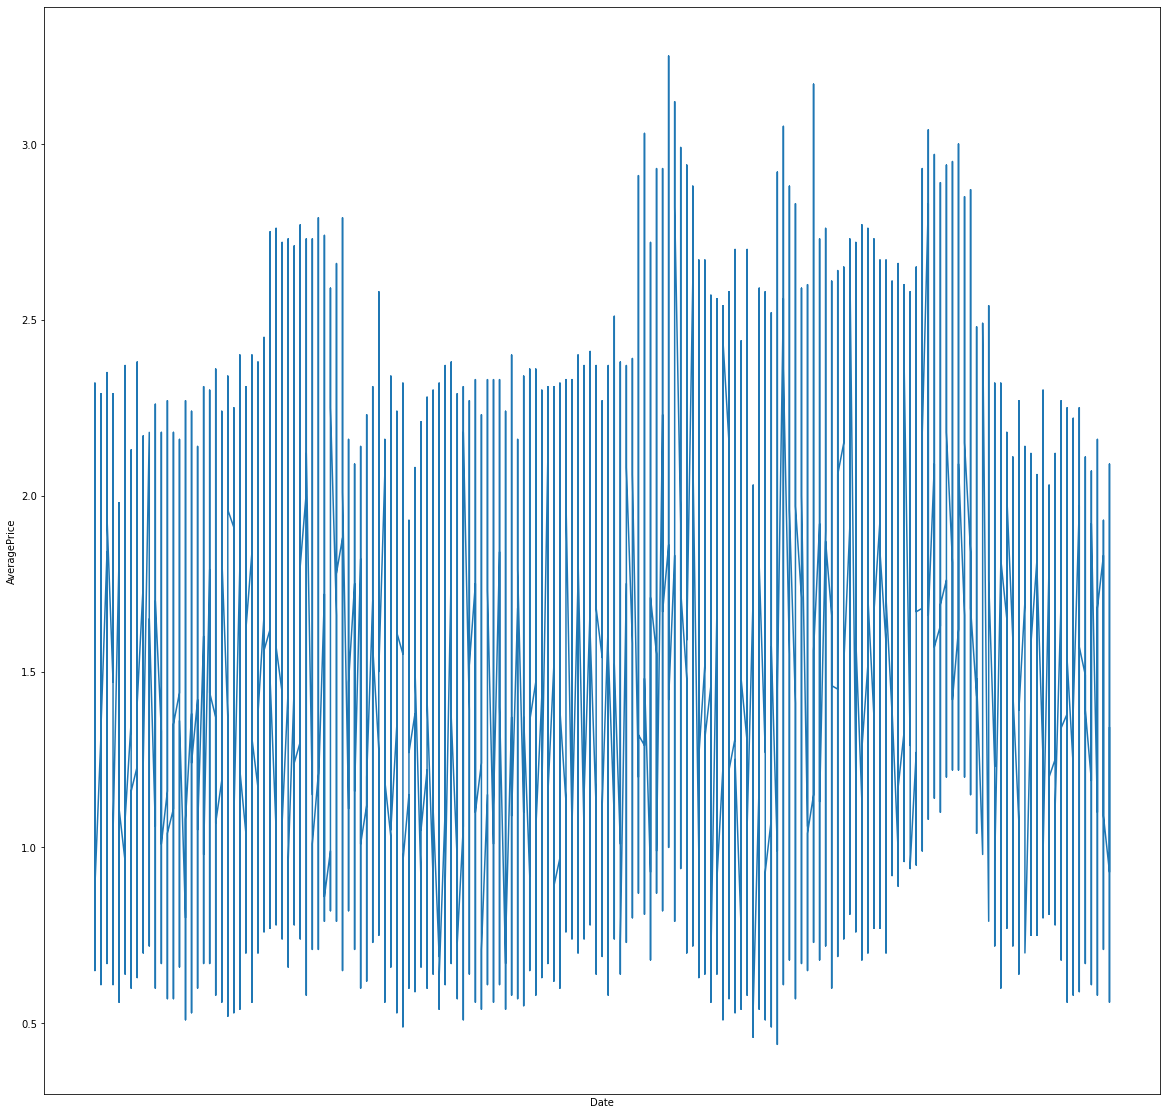

In [15]:
plt.figure(figsize = (20,20))
plt.plot(avocado_dataset['Date'] , avocado_dataset['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.xticks([])
plt.show()

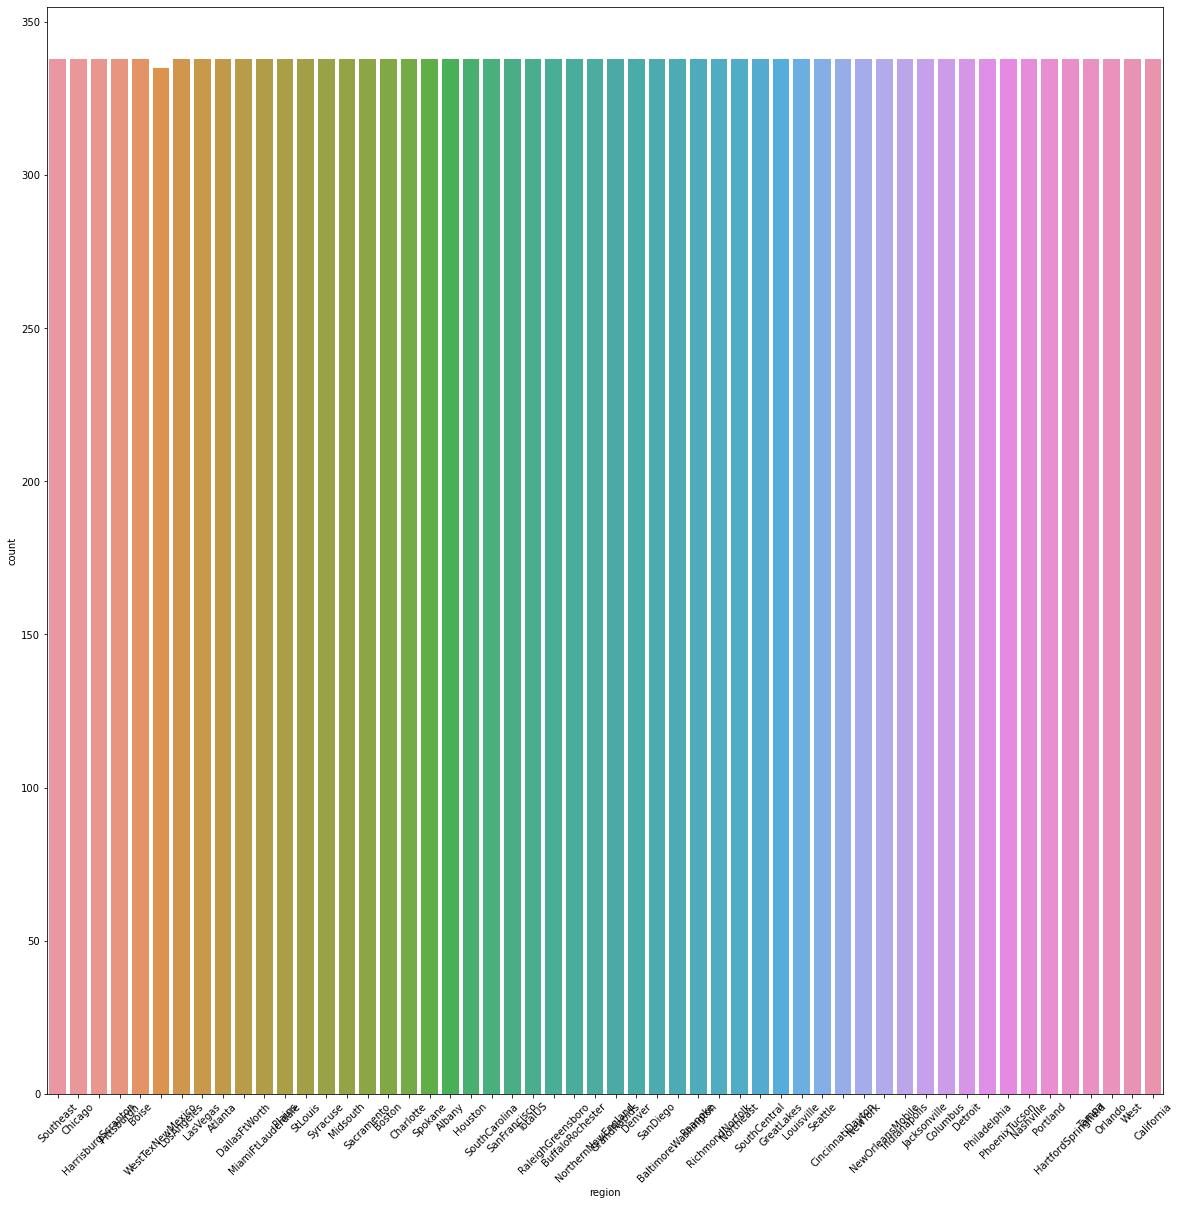

In [16]:
plt.figure(figsize = (20,20))
plt.xticks(rotation = 45)
sns.countplot(x = 'region' , data = avocado_dataset)

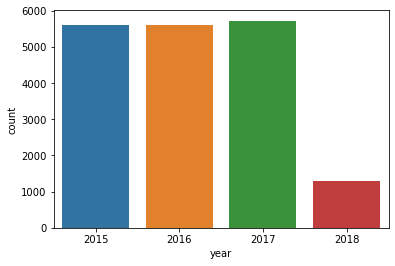

In [17]:
sns.countplot(x = 'year' , data = avocado_dataset)

In [19]:
avocado_prophet = avocado_dataset[['Date','AveragePrice']]

In [20]:
avocado_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [22]:
avocado_prophet = avocado_prophet.rename(columns = {'Date':'ds','AveragePrice':'y'})

In [23]:
avocado_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [24]:
prophet = Prophet()
prophet.fit(avocado_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = prophet.make_future_dataframe(periods=365)

In [27]:
forecast = prophet.predict(future)

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.897486,1.877424,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.903010,1.865241,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.865062,1.872900,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.909419,1.864743,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.914140,1.871514,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161737,0.568961,1.580352,0.985534,1.328859,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,0.0,0.0,0.0,1.075448
18610,2019-03-22,1.161007,0.551040,1.578487,0.984212,1.328600,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,0.0,0.0,0.0,1.076384
18611,2019-03-23,1.160276,0.557009,1.589170,0.982890,1.328340,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,0.0,0.0,0.0,1.077594
18612,2019-03-24,1.159545,0.543650,1.593797,0.981488,1.328063,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,0.0,0.0,0.0,1.079056


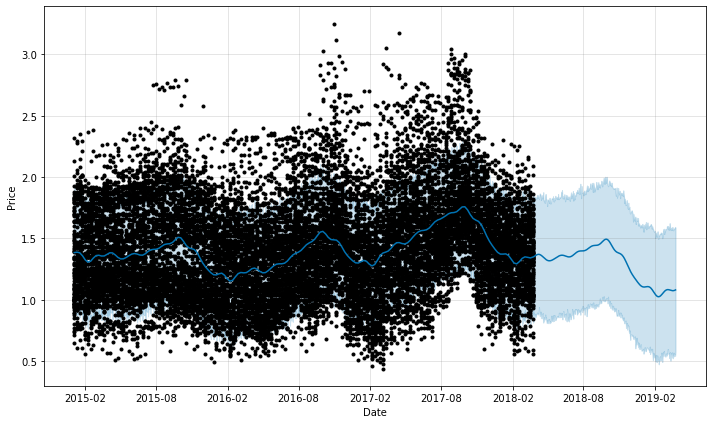

In [29]:
figure = prophet.plot(forecast , xlabel = 'Date' , ylabel = 'Price')

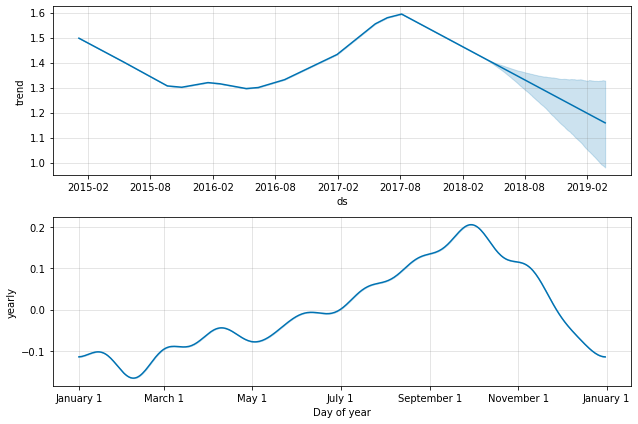

In [31]:
figure = prophet.plot_components(forecast)

In [58]:
avocado_dataset = pd.read_csv(dataset_path)

In [59]:
avocado_dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [60]:
avocado_dataset['region'].value_counts()

Portland               338
Plains                 338
Houston                338
HarrisburgScranton     338
LosAngeles             338
Sacramento             338
Denver                 338
Roanoke                338
Midsouth               338
SanDiego               338
LasVegas               338
SouthCarolina          338
Chicago                338
PhoenixTucson          338
Atlanta                338
StLouis                338
West                   338
Orlando                338
NorthernNewEngland     338
GrandRapids            338
BuffaloRochester       338
Spokane                338
RichmondNorfolk        338
BaltimoreWashington    338
SanFrancisco           338
CincinnatiDayton       338
Charlotte              338
California             338
Indianapolis           338
Northeast              338
Columbus               338
Syracuse               338
GreatLakes             338
Philadelphia           338
Pittsburgh             338
NewYork                338
TotalUS                338
D

In [61]:
avocado_dataset_sample = avocado_dataset[avocado_dataset['region'] == 'West']

In [62]:
avocado_dataset_sample.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [63]:
avocado_dataset_sample = avocado_dataset_sample.sort_values('Date')

In [64]:
avocado_dataset_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [65]:
avocado_prophet = avocado_dataset_sample[['Date','AveragePrice']]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


([], <a list of 0 Text major ticklabel objects>)

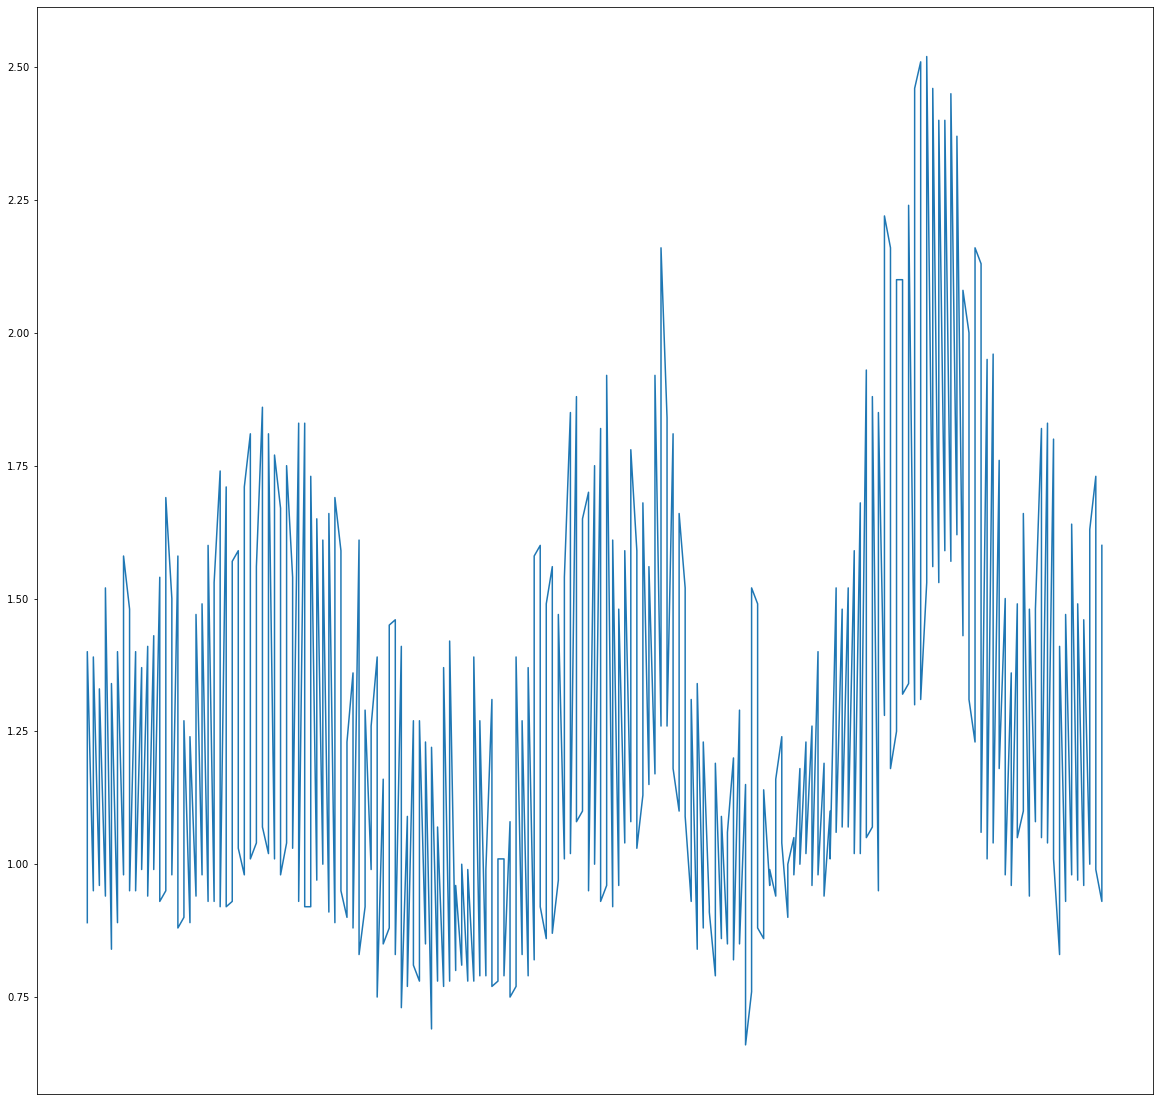

In [66]:
plt.figure(figsize = (20,20))
plt.plot(avocado_dataset_sample['Date'] , avocado_dataset_sample['AveragePrice'])
plt.xticks([])

In [67]:
avocado_prophet = avocado_prophet.rename(columns = {'Date':'ds','AveragePrice':'y'})

In [68]:
avocado_prophet

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [69]:
prophet = Prophet()
prophet.fit(avocado_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)

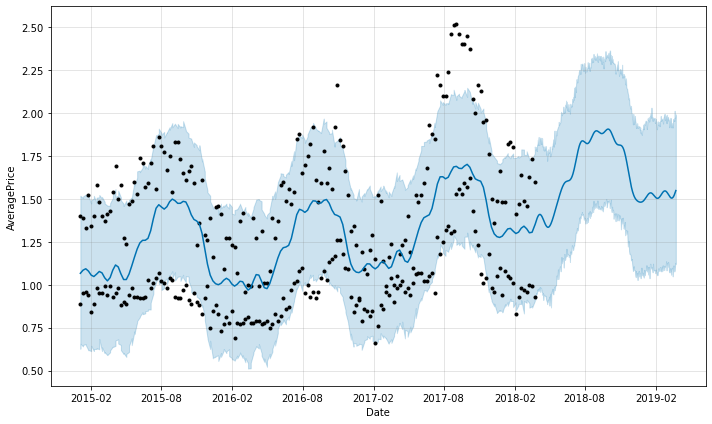

In [74]:
figure = prophet.plot(forecast , xlabel = 'Date' , ylabel = 'AveragePrice')

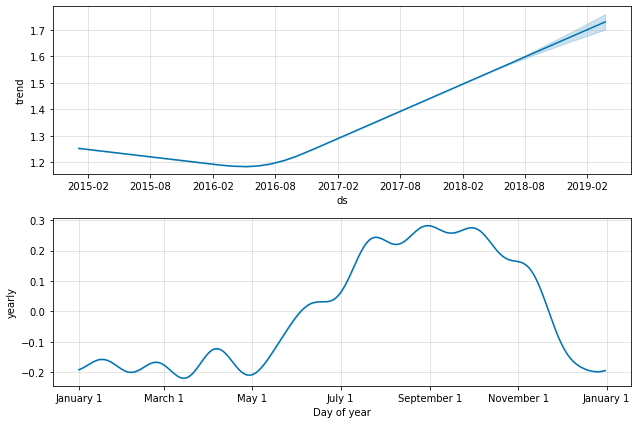

In [75]:
figure = prophet.plot_components(forecast)